# Analysis of UNHCR-Asylum-Application from 2010-2023

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/asylum-applications.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8390 entries, 0 to 8389
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     8390 non-null   int64 
 1   Country of origin        8390 non-null   object
 2   Country of asylum        8390 non-null   object
 3   Country of origin (ISO)  8390 non-null   object
 4   Country of asylum (ISO)  8390 non-null   object
 5   Authority                8390 non-null   object
 6   Application type         8365 non-null   object
 7   Stage of procedure       8142 non-null   object
 8   Cases / Persons          8390 non-null   object
 9   applied                  8390 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 655.6+ KB


## Number of Applications from different countries

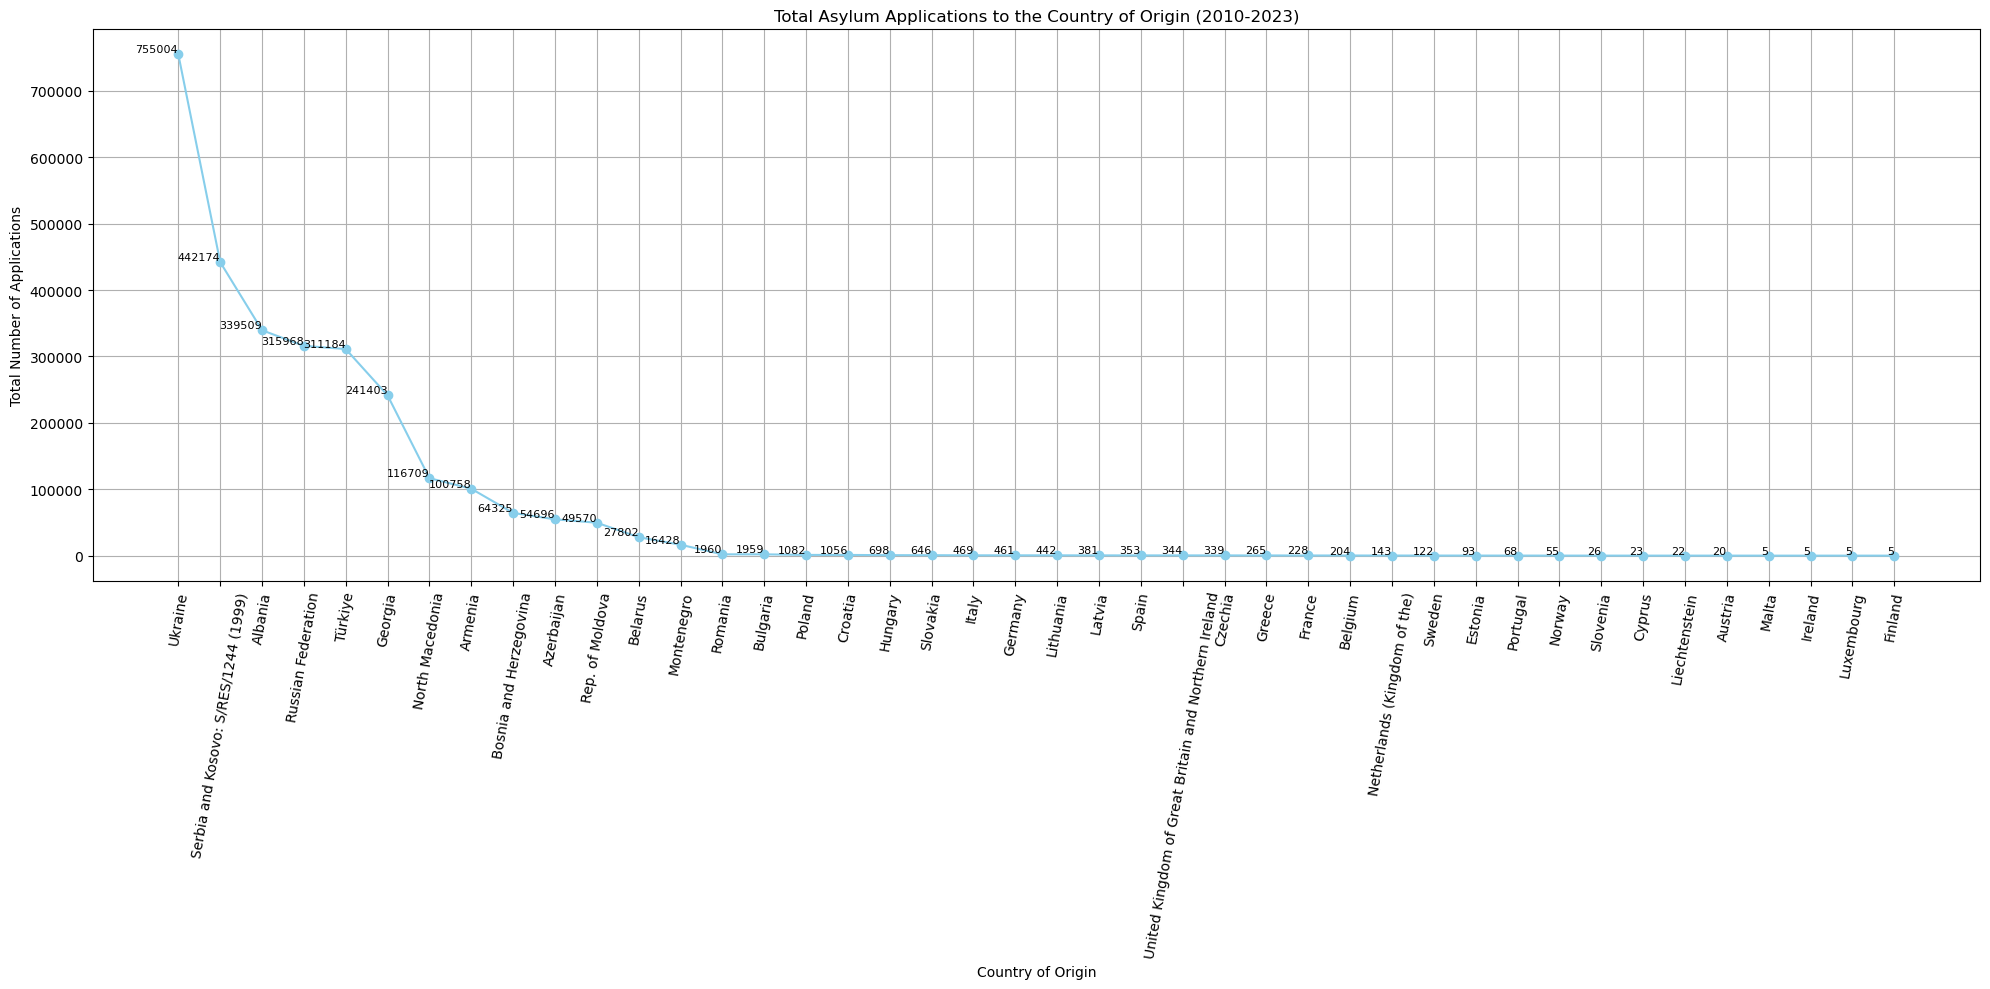

In [27]:
# Grouping the data by 'Country of origin' and summing up the 'applied' column to get the total applications
origin_counts = df.groupby('Country of origin')['applied'].sum().reset_index()

# Sorting the countries by the total number of applications in descending order
origin_counts_sorted = origin_counts.sort_values(by='applied', ascending=False)

# Creating the line plot
plt.figure(figsize=(20, 10))
plt.plot(origin_counts_sorted['Country of origin'], origin_counts_sorted['applied'], marker='o', color='skyblue')

# Adding the exact figure beside each country name
for i, (country, count) in enumerate(zip(origin_counts_sorted['Country of origin'], origin_counts_sorted['applied'])):
    plt.text(i, count, str(count), ha='right', va='bottom', fontsize=8)

plt.title('Total Asylum Applications to the Country of Origin (2010-2023)')
plt.xlabel('Country of Origin')
plt.ylabel('Total Number of Applications')
plt.xticks(rotation=80)
plt.grid(True)
plt.tight_layout()
plt.show()

## Top 10 Destination Countries for Asylum Seekers

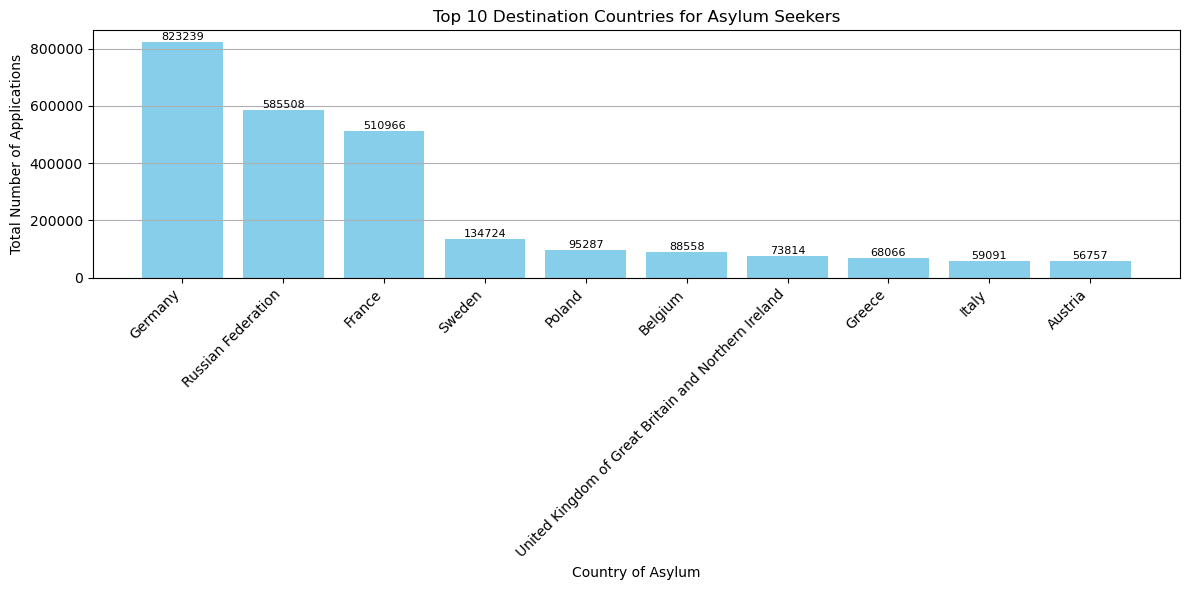

In [34]:
# Grouping the data by 'Country of asylum' and summing up the 'applied' column to get the total applications
destination_counts = df.groupby('Country of asylum')['applied'].sum().reset_index()

# Sorting the destination countries by the total number of applications in descending order
destination_counts_sorted = destination_counts.sort_values(by='applied', ascending=False)

# Selecting the top 10 destination countries
top_10_destinations = destination_counts_sorted.head(10)

# Creating the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_destinations['Country of asylum'], top_10_destinations['applied'], color='skyblue')

# Adding the exact figure beside each country name
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=8)

plt.title('Top 10 Destination Countries for Asylum Seekers')
plt.xlabel('Country of Asylum')
plt.ylabel('Total Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Least 10 Destination Countries for Asylum Seekers

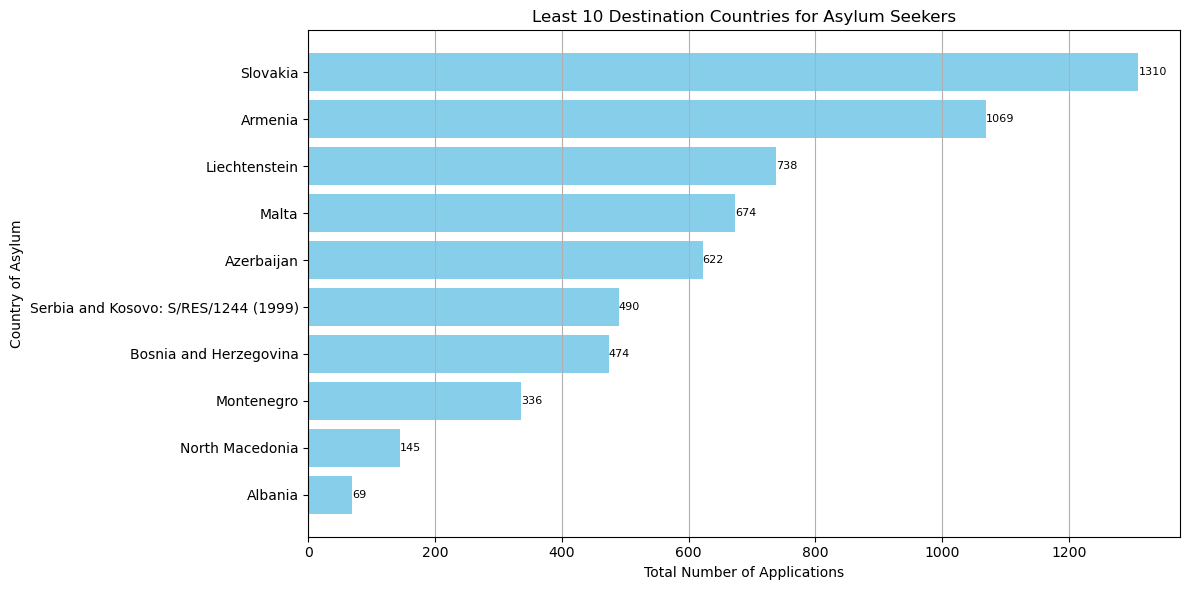

In [36]:
# Grouping the data by 'Country of asylum' and summing up the 'applied' column to get the total applications
destination_counts = df.groupby('Country of asylum')['applied'].sum().reset_index()

# Sorting the destination countries by the total number of applications in ascending order
destination_counts_sorted = destination_counts.sort_values(by='applied', ascending=True)

# Selecting the least 10 destination countries
least_10_destinations = destination_counts_sorted.head(10)

# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.barh(least_10_destinations['Country of asylum'], least_10_destinations['applied'], color='skyblue')

# Adding the exact figure beside each country name
for i, (country, count) in enumerate(zip(least_10_destinations['Country of asylum'], least_10_destinations['applied'])):
    plt.text(count, i, str(count), ha='left', va='center', fontsize=8)

plt.title('Least 10 Destination Countries for Asylum Seekers')
plt.xlabel('Total Number of Applications')
plt.ylabel('Country of Asylum')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


## Relationship between Number of Applications and Country of Origin

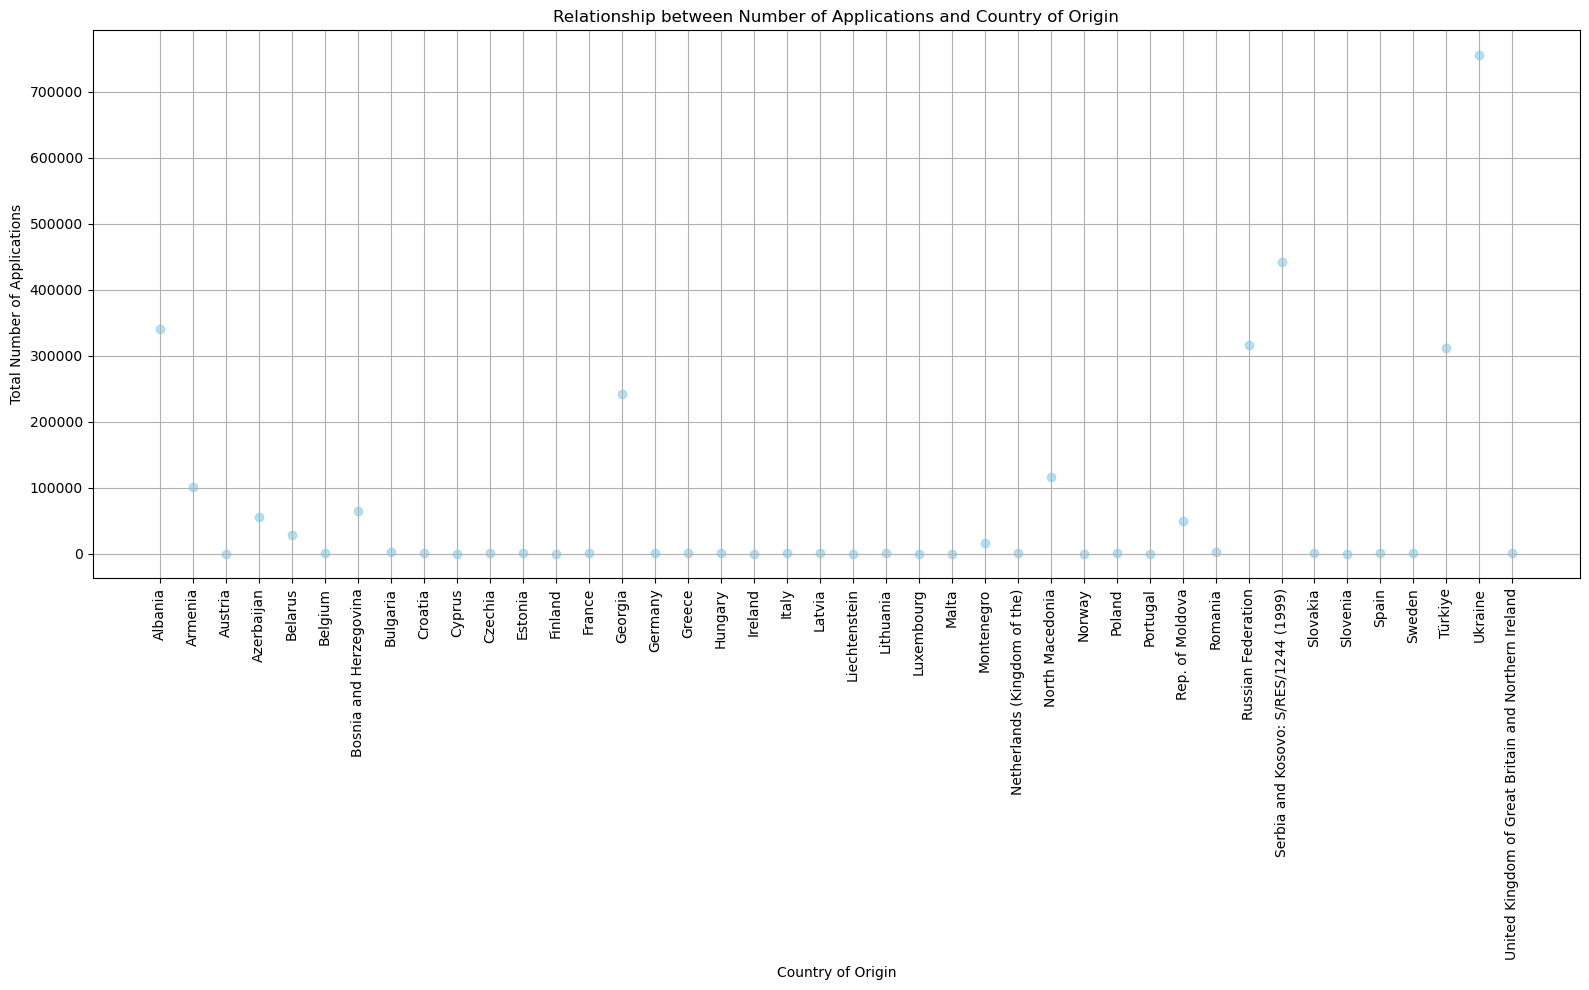

In [33]:

# Grouping the data by 'Country of origin' and summing up the 'applied' column to get the total applications
origin_counts = df.groupby('Country of origin')['applied'].sum().reset_index()

# Creating the scatter plot
plt.figure(figsize=(16, 10))
plt.scatter(origin_counts['Country of origin'], origin_counts['applied'], color='skyblue', alpha=0.6)

plt.title('Relationship between Number of Applications and Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Total Number of Applications')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


## Total Applications to Germany

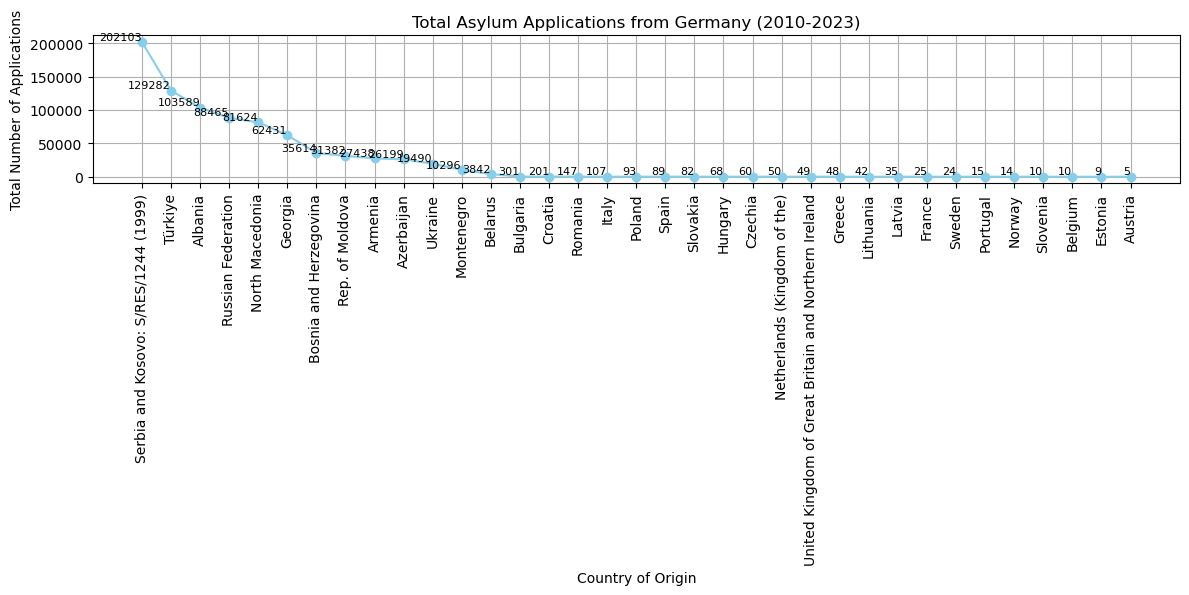

In [29]:
# Find the highest destination country by total number of applications
highest_destination_country = df.groupby('Country of asylum')['applied'].sum().idxmax()

# Filter the DataFrame to include only data related to the highest destination country
filtered_df = df[df['Country of asylum'] == highest_destination_country]

# Grouping the filtered data by 'Country of origin' and summing up the 'applied' column to get the total applications
origin_counts = filtered_df.groupby('Country of origin')['applied'].sum().reset_index()

# Sorting the origin countries by the total number of applications in descending order
origin_counts_sorted = origin_counts.sort_values(by='applied', ascending=False)

# Creating the line plot
plt.figure(figsize=(12, 6))
plt.plot(origin_counts_sorted['Country of origin'], origin_counts_sorted['applied'], marker='o', color='skyblue')

# Adding the exact figure beside each country name
for i, (country, count) in enumerate(zip(origin_counts_sorted['Country of origin'], origin_counts_sorted['applied'])):
    plt.text(i, count, str(count), ha='right', va='bottom', fontsize=8)

plt.title(f'Total Asylum Applications from {highest_destination_country} (2010-2023)')
plt.xlabel('Country of Origin')
plt.ylabel('Total Number of Applications')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


## Total Asylum Applications by Application Type (Descending Order)

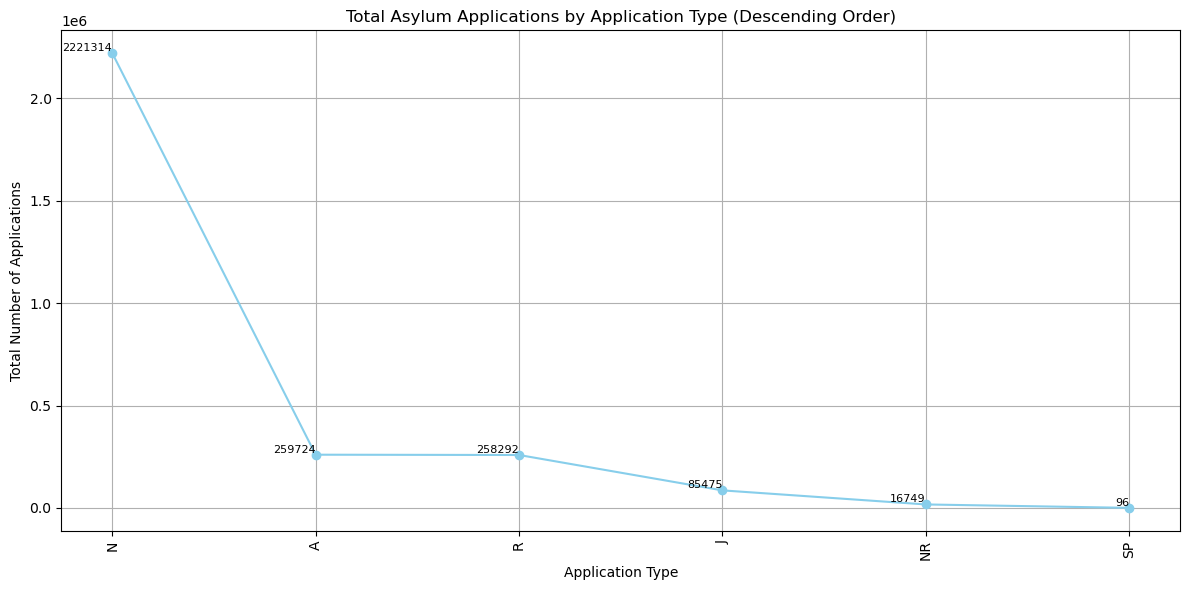

In [41]:
# Grouping the data by 'Application type' and summing up the 'applied' column to get the total applications
application_type_counts = df.groupby('Application type')['applied'].sum().reset_index()

# Sorting the application types by the total number of applications in descending order
application_type_counts_sorted = application_type_counts.sort_values(by='applied', ascending=False)

# Creating the line plot
plt.figure(figsize=(12, 6))
plt.plot(application_type_counts_sorted['Application type'], application_type_counts_sorted['applied'], marker='o', color='skyblue')

# Adding the exact figure beside each application type
for i, (app_type, count) in enumerate(zip(application_type_counts_sorted['Application type'], application_type_counts_sorted['applied'])):
    plt.text(i, count, str(count), ha='right', va='bottom', fontsize=8)

plt.title('Total Asylum Applications by Application Type (Descending Order)')
plt.xlabel('Application Type')
plt.ylabel('Total Number of Applications')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


N - New applications

R - Repeat applications

A - Appeal applications

NR - New and repeat applications: where the data was provided together

J - Judiciary: applications are at the Judicial level.

SP - Subsidiary protection: used prior to the inclusion of subsidiary protection in Europe. Used by Belgium in 2008 and Ireland in 2011

## Total Asylum Applications by Application Type and Country

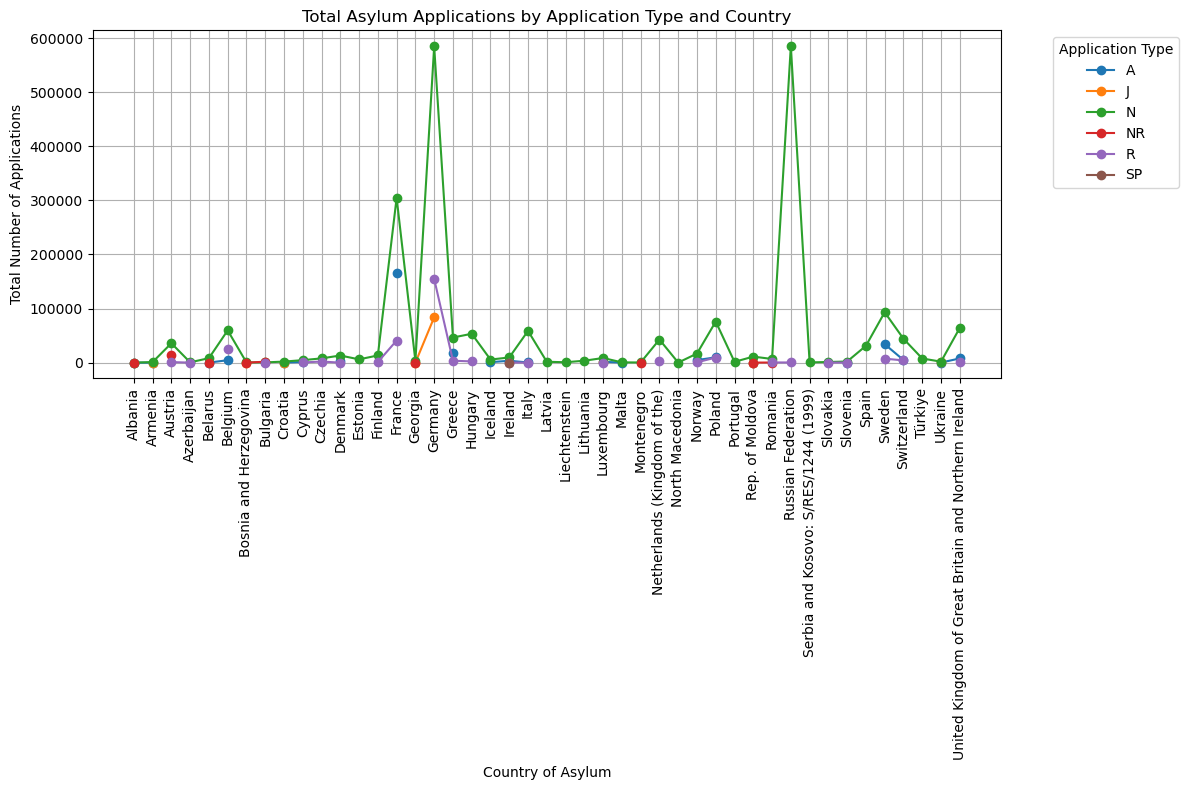

In [57]:
# Grouping the data by 'Country of asylum' and 'Application type' and summing up the 'applied' column
country_application_counts = df.groupby(['Country of asylum', 'Application type'])['applied'].sum().unstack()

# Plotting the line plot
plt.figure(figsize=(12, 8))
for application_type in country_application_counts.columns:
    plt.plot(country_application_counts.index, country_application_counts[application_type], marker='o', label=application_type)

plt.title('Total Asylum Applications by Application Type and Country')
plt.xlabel('Country of Asylum')
plt.ylabel('Total Number of Applications')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Application Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Country of Origin with the Highest Number of Applications per Year

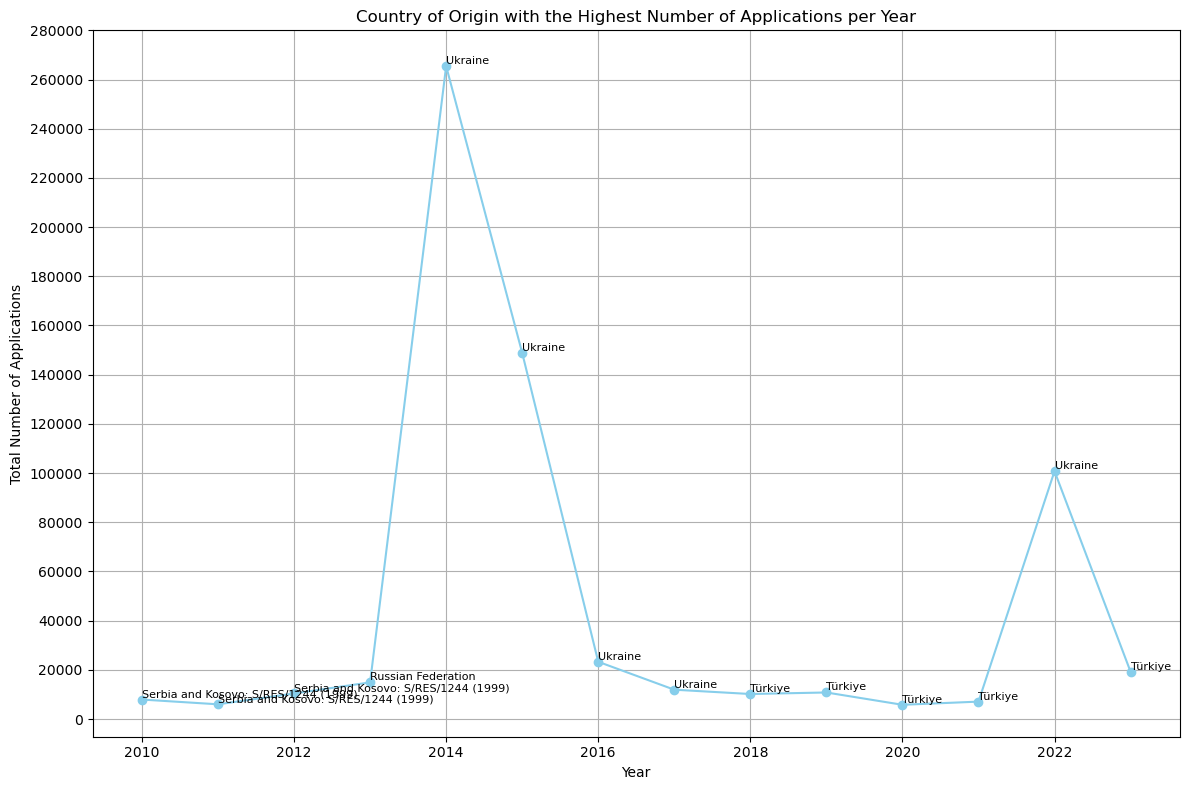

In [68]:
# Grouping the data by 'Year' and finding the index of the row with the maximum number of applications each year
idx_max_per_year = df.groupby('Year')['applied'].idxmax()

# Selecting the rows corresponding to the maximum applications for each year
highest_origin_per_year = df.loc[idx_max_per_year]

# Plotting the line plot
plt.figure(figsize=(12, 8))
plt.plot(highest_origin_per_year['Year'], highest_origin_per_year['applied'], marker='o', color='skyblue')

# Adding country names to the data points
for year, country, applications in zip(highest_origin_per_year['Year'], highest_origin_per_year['Country of origin'], highest_origin_per_year['applied']):
    plt.text(year, applications, country, fontsize=8, ha='left', va='bottom')

plt.title('Country of Origin with the Highest Number of Applications per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Applications')
plt.yticks(range(0, int(highest_origin_per_year['applied'].max()) + 20000, 20000))
plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


## Distribution of Processing Entities Across Countries

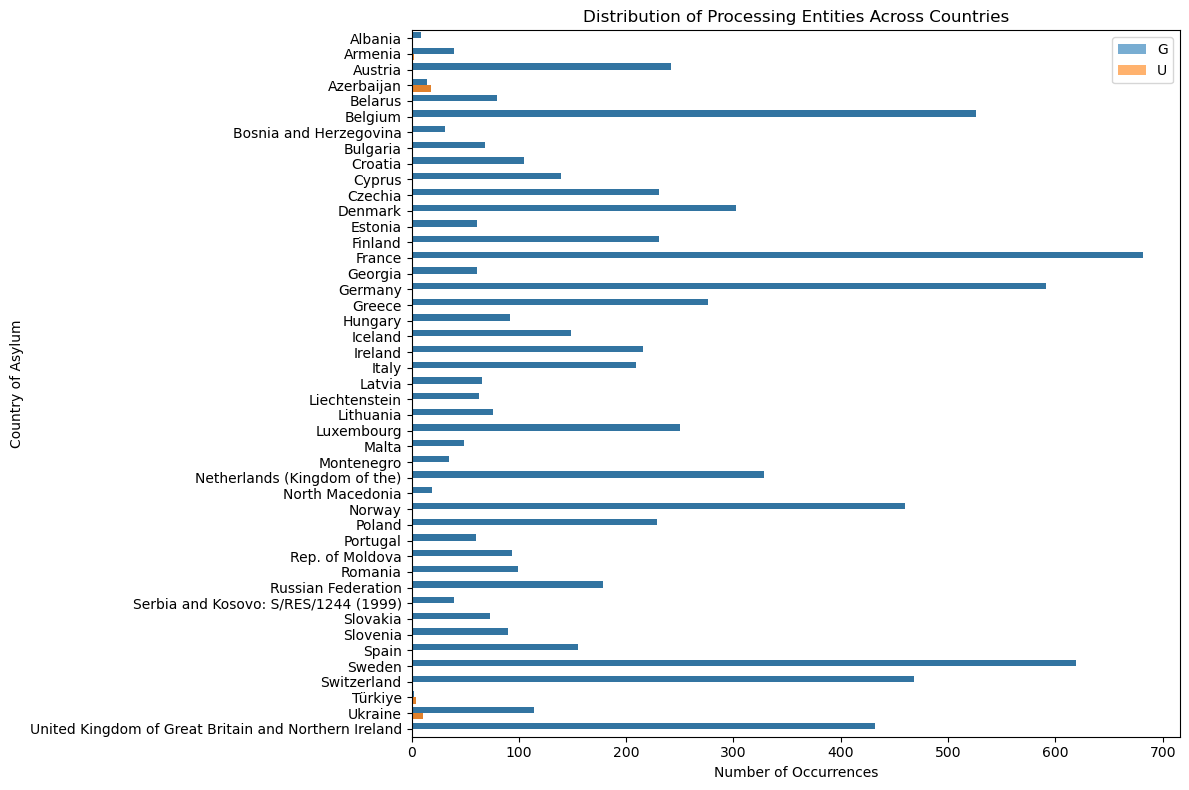

In [78]:
# Grouping the data by 'Country of asylum' and 'Authority' and counting the number of occurrences
processing_entity_counts = df.groupby(['Country of asylum', 'Authority']).size().reset_index(name='Count')

# Creating a color palette for different processing entities
num_authorities = len(processing_entity_counts['Authority'].unique())
color_palette = sns.color_palette('tab10', num_authorities)

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=processing_entity_counts, x='Count', y='Country of asylum', hue='Authority', palette=color_palette)

# Adding a legend
handles = [plt.Rectangle((0, 0), 1, 1, edgecolor='none', alpha=0.6, facecolor=color_palette[i]) for i in range(num_authorities)]
plt.legend(handles, processing_entity_counts['Authority'].unique(), loc='upper right')

plt.title('Distribution of Processing Entities Across Countries')
plt.xlabel('Number of Occurrences')
plt.ylabel('Country of Asylum')
plt.tight_layout()
plt.show()
